In [1]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from collections import defaultdict

In [4]:
order=pd.read_csv('Data/train1.csv')

In [5]:
order.describe()

region_id           slot            gap          order  \
count  199584.00000  199584.000000  199584.000000  199584.000000   
mean       33.50000      72.500000       7.598104      42.792078   
std        19.05042      41.568321      45.229539     103.652317   
min         1.00000       1.000000       0.000000       0.000000   
25%        17.00000      36.750000       0.000000       1.000000   
50%        33.50000      72.500000       1.000000       7.000000   
75%        50.00000     108.250000       3.000000      32.000000   
max        66.00000     144.000000    3872.000000    4362.000000   

              sumgap        WeekDay        Weather           Temp  \
count  199584.000000  199584.000000  199584.000000  199584.000000   
mean     1094.126984       3.000000       2.502024       5.367329   
std      3100.716422       2.000005       1.882603       3.955454   
min         8.000000       0.000000       0.000000       0.000000   
25%        73.000000       1.000000       2.000000       1.000000   
50%       155.000000       3.000000       2.000000       5.000000   
75%       697.000000       5.000000       4.000000       8.000000   
max     58704.000000       6.000000       9.000000      19.000000   

                PM25       POI_Sum  
count  199584.000000  1.995840e+05  
mean       97.471065  2.964874e+05  
std        64.411942  5.219022e+05  
min         6.000000  2.988000e+03  
25%        49.000000  5.079600e+04  
50%        98.000000  1.011770e+05  
75%       143.000000  2.546440e+05  
max       276.000000  3.340833e+06

# With Outleirs 

In [6]:
od=np.array(order)
feat=np.array([0,1,3,5,6,7,8,9])
#feat=[0,1,3,5]

X_train=od[:150000,feat]
y_train=od[:150000,2]
X_test=od[150000:,feat]
y_test=od[150000:,2]

In [7]:
params = {'n_estimators': 100, 'max_depth': 5,'min_samples_split': 10,
      'learning_rate': 0.05, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

print mean_absolute_error(y_train, clf.predict(X_train))
mae = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE: %.6f" % mae)

3.22749776459
MAE: 4.223338


In [8]:
print mean_absolute_error(y_train, clf.predict(X_train))
mae = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE: %.6f" % mae)

3.22749776459
MAE: 4.223338


# Outliers Detection 
 

## Order v/s gap

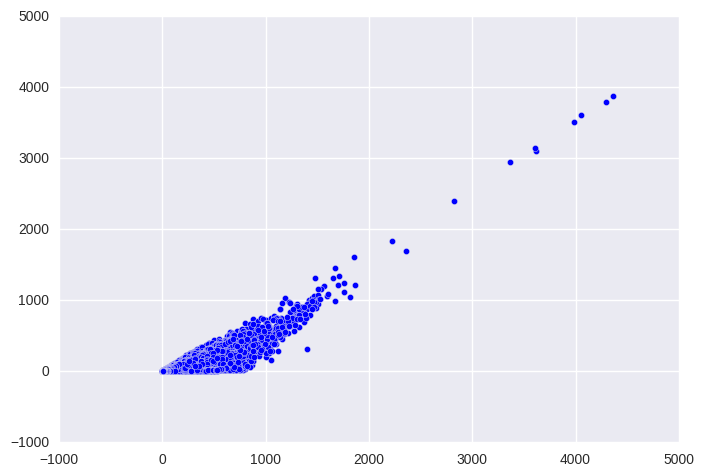

In [9]:
plt.scatter(order.order,order.gap)

In [13]:
#order.gap[order.gap>1500]=order.gap.mean()
order=order[order.gap<1500]


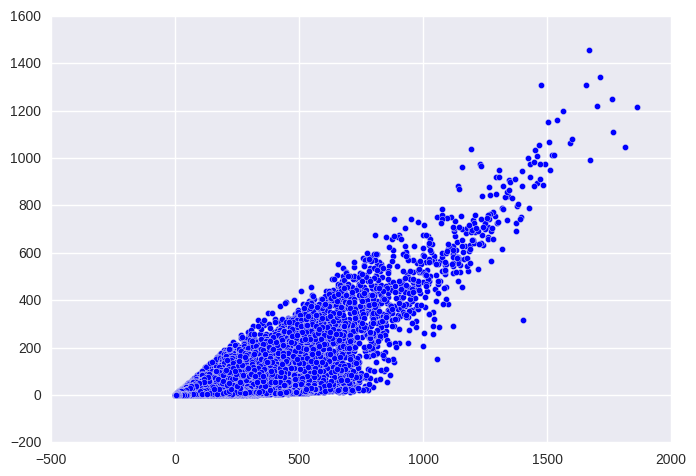

In [12]:
plt.scatter(up_order.order,up_order.gap)

In [16]:
up_order[up_order.order>2000]

Empty DataFrame
Columns: [region_id, slot, gap, order, sumgap, WeekDay, Weather, Temp, PM25, POI_Sum]
Index: []

### After removing outliers in order

In [17]:
od=np.array(up_order)
feat=[0,1,3,5,6,7,8,9]
#feat=[0,1,3,5]

X_train=od[:150000,feat]
y_train=od[:150000:,2]
X_test=od[150000:,feat]
y_test=od[150000:,2]

In [18]:
params = {'n_estimators': 100, 'max_depth': 5,'min_samples_split': 10,
      'learning_rate': 0.05, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

mae1 = mean_absolute_error(y_train, clf.predict(X_train))
mae2 = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE at Train : %.6f" % mae1) , ("MEA at Test : %.6f" % mae2 )

MAE at Train : 3.081357 MEA at Test : 4.061122


# Slot v/s Gap

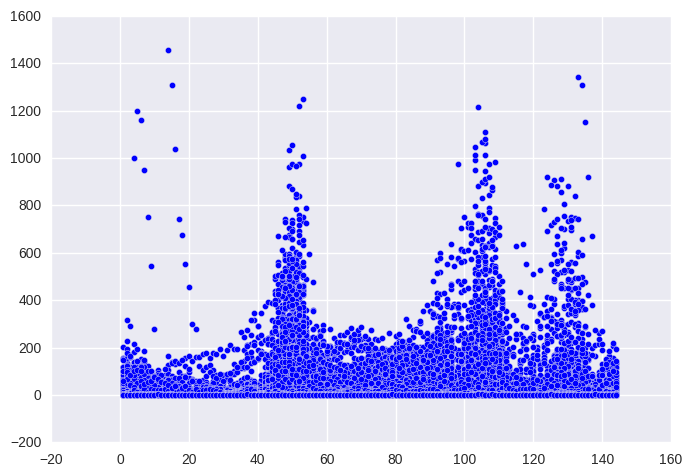

In [14]:
plt.scatter(order.slot,order.gap)

In [20]:
order=up_order

In [21]:
order.gap[(order.slot <22) & (order.gap > 400)]=order.gap.mean()
order.gap[order.gap>=1200]=order.gap.mean()
order.gap[(order.slot > 120) & (order.slot<140) & (order.gap>1000)]=order.gap.mean()

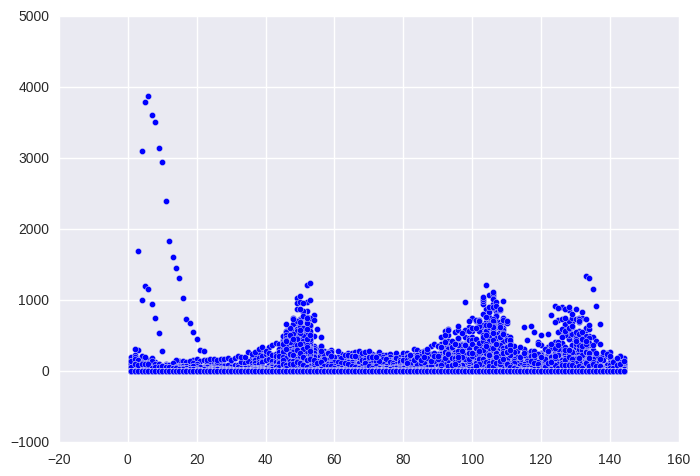

In [8]:
plt.scatter(order.slot,order.gap)

### After removing outliers in order

In [15]:
od=np.array(order)
feat=[0,1,3,5,6,7,8,9]
#feat=[0,1,3,5]

X_train=od[:150000,feat]
y_train=od[:150000:,2]
X_test=od[150000:,feat]
y_test=od[150000:,2]

In [16]:
params = {'n_estimators': 100, 'max_depth': 5,'min_samples_split': 10,
      'learning_rate': 0.05, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

mae1 = mean_absolute_error(y_train, clf.predict(X_train))
mae2 = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE at Train : %.6f" % mae1) , ("MEA at Test : %.6f" % mae2 )

MAE at Train : 3.081357 MEA at Test : 4.061717


## WeekDay v/s Gap

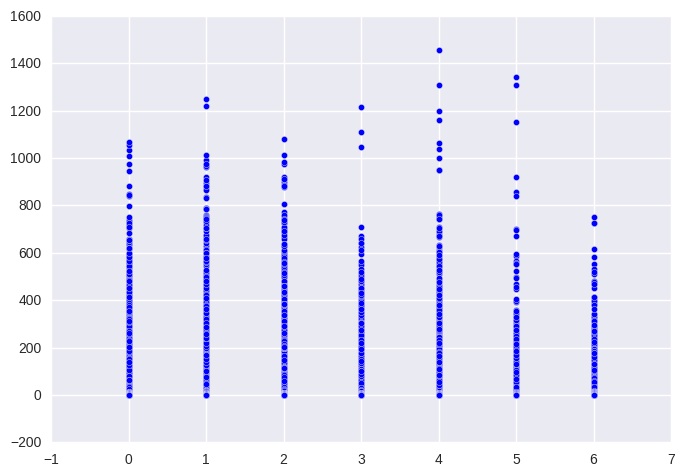

In [15]:
plt.scatter(order.WeekDay,order.gap)

In [16]:
order.gap[(order.WeekDay==3) & (order.gap>800)]=order.gap.mean()
order.gap[(order.WeekDay==4) & (order.gap>800)]=order.gap.mean()
order.gap[(order.WeekDay==5) & (order.gap>800)]=order.gap.mean()
order.gap[(order.WeekDay==6) & (order.gap>650)]=order.gap.mean()

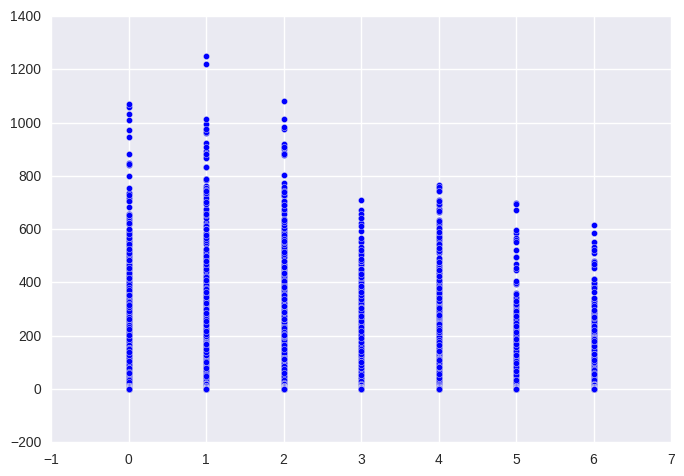

In [17]:
plt.scatter(order.WeekDay,order.gap)

### After removing outliers in WeekDay

In [5]:
od=np.array(order)
feat=[0,1,3,5,6,7,8,9]
#feat=[0,1,3,5]

X_train=od[:150000,feat]
y_train=od[:150000:,2]
X_test=od[150000:,feat]
y_test=od[150000:,2]

In [19]:
params = {'n_estimators': 500, 'max_depth': 5,'min_samples_split': 2,
      'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

mae1 = mean_absolute_error(y_train, clf.predict(X_train))
mae2 = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE at Train : %.6f" % mae1) , ("MEA at Test : %.6f" % mae2 )

MAE at Train : 3.025076 MEA at Test : 4.061827


# SumGap v/s Gap

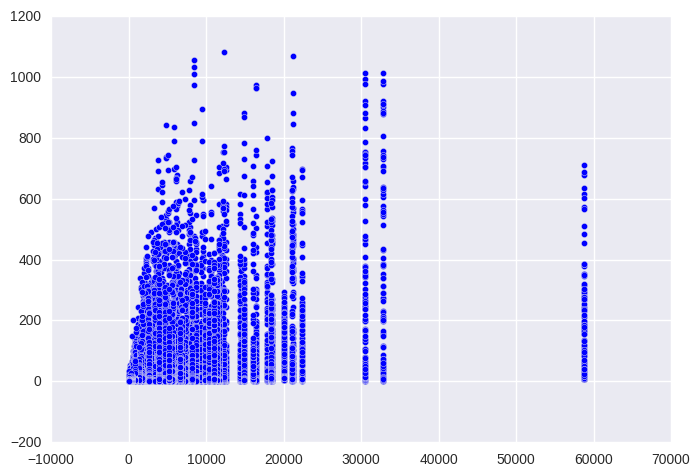

In [67]:
plt.scatter(order.sumgap,order.gap)

# Weather v/s Gap

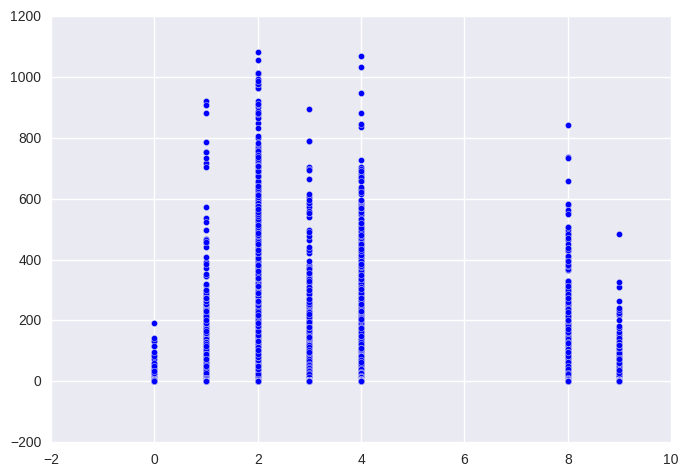

In [25]:
plt.scatter(order.Weather,order.gap)

In [26]:
order.gap[(order.Weather==3) & (order.gap>690)]=order.gap.mean()
order.gap[(order.Weather==8) & (order.gap>690)]=order.gap.mean()
order.gap[(order.Weather==9) & (order.gap>400)]=order.gap.mean()

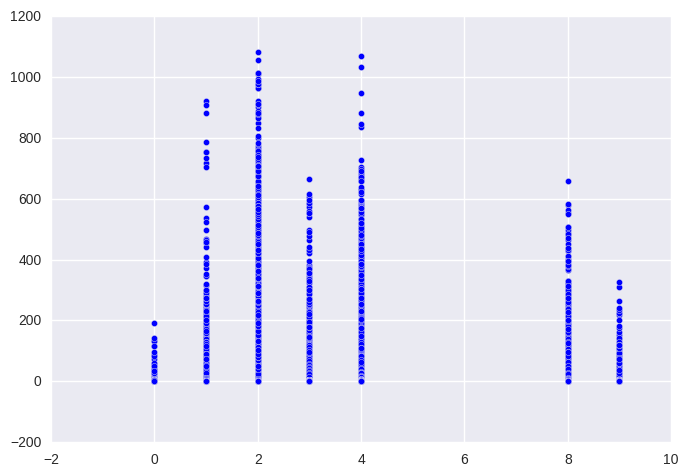

In [27]:
plt.scatter(order.Weather,order.gap)

### After removing outliers in Weather

In [30]:
od=np.array(order)
feat=[0,1,3,5,6,7,8,9]
#feat=[0,1,3,5]

X_train=od[:150000,feat]
y_train=od[:150000:,2]
X_test=od[150000:,feat]
y_test=od[150000:,2]

In [31]:
params = {'n_estimators': 500, 'max_depth': 5,'min_samples_split': 2,
      'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

mae1 = mean_absolute_error(y_train, clf.predict(X_train))
mae2 = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE at Train : %.6f" % mae1) , ("MEA at Test : %.6f" % mae2 )

MAE at Train : 3.084064 MEA at Test : 4.398235


# Temp v/s Gap

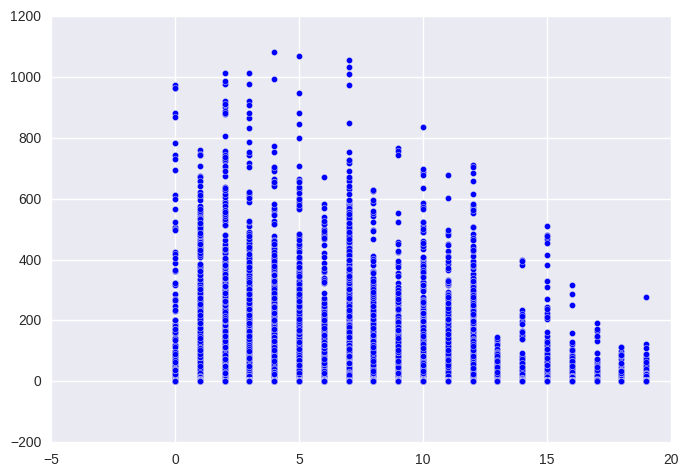

In [32]:
plt.scatter(order.Temp,order.gap)

In [33]:
order.gap[(order.Temp==0) & (order.gap>800)]=order.gap.mean()
order.gap[(order.Temp==4) & (order.gap>800)]=order.gap.mean()
order.gap[(order.Temp==5) & (order.gap>780)]=order.gap.mean()
order.gap[(order.Temp==6) & (order.gap>600)]=order.gap.mean()
order.gap[(order.Temp==7) & (order.gap>800)]=order.gap.mean()
order.gap[(order.Temp==9) & (order.gap>600)]=order.gap.mean()
order.gap[(order.Temp==10) & (order.gap>800)]=order.gap.mean()
order.gap[(order.Temp==11) & (order.gap>550)]=order.gap.mean()
order.gap[(order.Temp==14) & (order.gap>300)]=order.gap.mean()
order.gap[(order.Temp==16) & (order.gap>200)]=order.gap.mean()
order.gap[(order.Temp==19) & (order.gap>200)]=order.gap.mean()

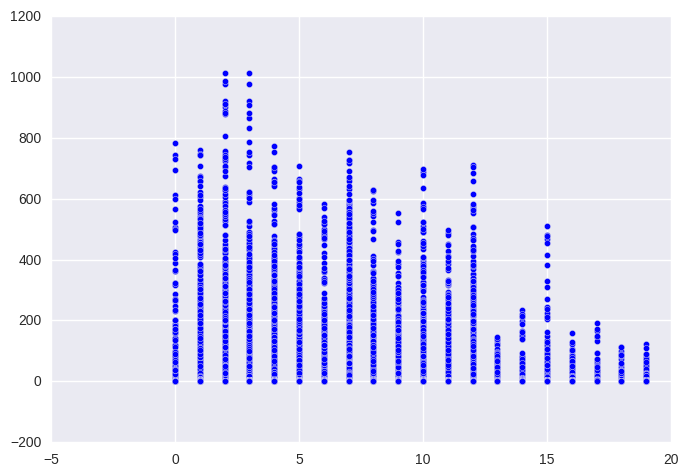

In [34]:
plt.scatter(order.Temp,order.gap)

### After removing outliers in Temp

In [6]:
od=np.array(order)
feat=[0,1,3,5,6,7,8,9]
#feat=[0,1,3,5]

X_train=od[:150000,feat]
y_train=od[:150000:,2]
X_test=od[150000:,feat]
y_test=od[150000:,2]

In [36]:
params = {'n_estimators': 500, 'max_depth': 5,'min_samples_split': 2,
      'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

mae1 = mean_absolute_error(y_train, clf.predict(X_train))
mae2 = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE at Train : %.6f" % mae1) , ("MEA at Test : %.6f" % mae2 )

MAE at Train : 3.085919 MEA at Test : 4.487210


# POI_SUM v/s GAP

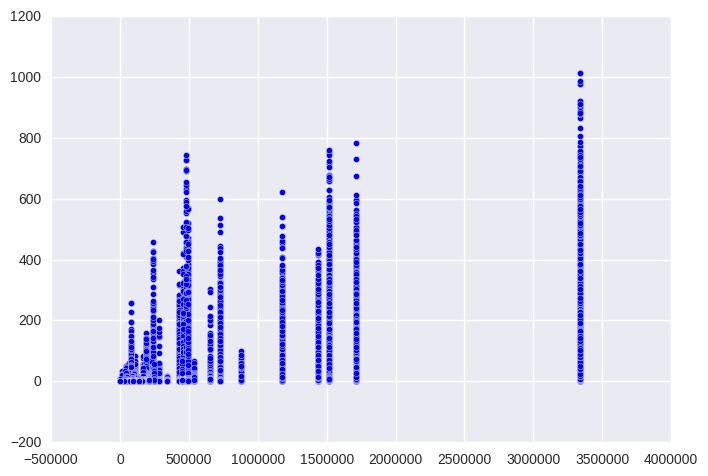

In [77]:
plt.scatter(order.POI_Sum,order.gap)

# PM25 v/s Gap

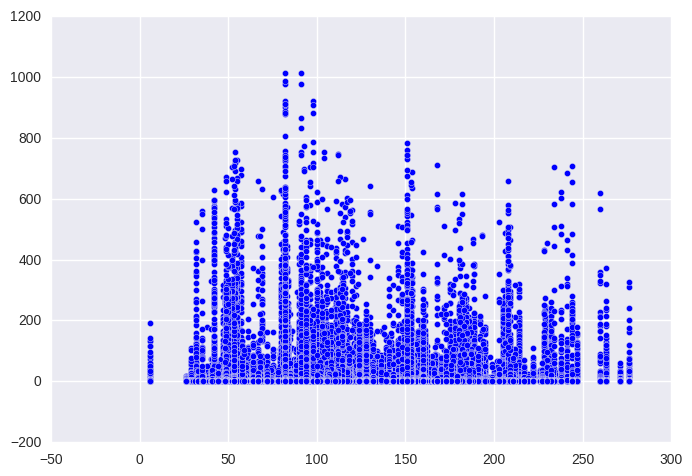

In [76]:
plt.scatter(order.PM25,order.gap)

# Training the model without outliers

In [7]:
od=np.array(order)
feat=[0,1,3,5,6,7,8,9]
#feat=[0,1,3,5]

X_train=od[:150000,feat]
y_train=od[:150000:,2]
X_test=od[150000:,feat]
y_test=od[150000:,2]

In [10]:
for i in range(5,10):
    params = {'n_estimators': 100, 'max_depth': i,'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

    clf = ensemble.GradientBoostingRegressor(**params)

    #clf.fit(X_train, y_train)
    clf.fit(od[:,feat], od[:,2])

    mae1 = mean_absolute_error(y_train, clf.predict(X_train))
    mae2 = mean_absolute_error(y_test, clf.predict(X_test))
    print("MAE at Train : %.6f" % mae1) , ("MEA at Test : %.6f" % mae2 )

MAE at Train : 6.030392 MEA at Test : 6.904054
MAE at Train : 5.727068 MEA at Test : 6.630415
MAE at Train : 5.478830 MEA at Test : 6.368587
MAE at Train : 5.245022 MEA at Test : 6.142259
MAE at Train : 4.987507 MEA at Test : 5.886959


In [24]:
params = {'n_estimators': 1000, 'max_depth': 10,'min_samples_split': 2,
      'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

#clf.fit(X_train, y_train)
clf.fit(od[:,feat], od[:,2])

mae1 = mean_absolute_error(y_train, clf.predict(X_train))
mae2 = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE at Train : %.6f" % mae1) , ("MEA at Test : %.6f" % mae2 )

MAE at Train : 1.219225 MEA at Test : 1.321233


# Testing on the kaggle Dataset

### Training on the whole Data

In [39]:
params = {'n_estimators': 900, 'max_depth': 9,'min_samples_split': 2,
      'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(od[:,feat], od[:,2])

mae1 = mean_absolute_error(y_train, clf.predict(X_train))
mae2 = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE at Train : %.6f" % mae1) , ("MEA at Test : %.6f" % mae2 )

MAE at Train : 1.449202 MEA at Test : 1.614268


### Testing the test data

In [10]:
t=pd.read_csv('Data/test_data1.csv')

In [11]:
t.describe()

region_id          slot         order       WeekDay       Weather  \
count  47520.000000  47520.000000  47520.000000  47520.000000  47520.000000   
mean      33.500000     72.500000     11.681881      3.400000      2.993056   
std       19.050572     41.568654     64.389835      2.154089      1.450573   
min        1.000000      1.000000      0.000000      0.000000      1.000000   
25%       17.000000     36.750000      0.000000      2.000000      2.000000   
50%       33.500000     72.500000      0.000000      4.000000      3.000000   
75%       50.000000    108.250000      0.000000      5.000000      4.000000   
max       66.000000    144.000000   1876.000000      6.000000      8.000000   

        Temperature          pm25           POI  
count  47520.000000  47520.000000  4.752000e+04  
mean       1.647222     65.754167  2.964874e+05  
std        3.358357     24.045624  5.219064e+05  
min       -6.000000     29.000000  2.988000e+03  
25%        1.000000     46.000000  5.079600e+04  
50%        2.000000     69.000000  1.011770e+05  
75%        4.000000     82.000000  2.546440e+05  
max        6.000000    117.000000  3.340833e+06

In [93]:

a=np.array(t)
X_test=a[:,:]

In [94]:
y_test=clf.predict(X_test)
pred_test=y_test

In [89]:
index=np.array(t.order==0)
pred_test[index]=0

In [95]:
pred_test=np.around(pred_test)